In [1]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('2021-06-24_Casos_Covid_19_-_Base_de_Dados.csv', sep=';')
df.columns = ['notification_date', 'class', 'age', 'gender', 'district', 'death_date', 'status', 'foo']
df.drop(columns='foo', inplace=True)
df

/Users/beelzebruno/.virtualenvs/ml/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,notification_date,class,age,gender,district,death_date,status
0,11/03/2020,CONFIRMADO,54,M,DSMZ,NaN,RECUPERADO
1,12/03/2020,CONFIRMADO,43,M,DSBQ,NaN,RECUPERADO
2,12/03/2020,CONFIRMADO,15,M,DSBQ,NaN,RECUPERADO
3,12/03/2020,CONFIRMADO,25,F,DSMZ,NaN,RECUPERADO
4,12/03/2020,CONFIRMADO,58,M,DSMZ,NaN,RECUPERADO
...,...,...,...,...,...,...,...
234120,19/06/2021,CONFIRMADO,63,F,DSBQ,NaN,NaN
234121,19/06/2021,CONFIRMADO,67,F,DSMZ,NaN,NaN
234122,19/06/2021,CONFIRMADO,55,F,NaN,NaN,NaN
234123,21/06/2021,CONFIRMADO,58,M,DSCJ,21/06/2021,�BITO CONF


In [3]:
print("Shape: ", df.shape)

Shape:  (234125, 7)


In [4]:
print("Unique values in every column \n"+'-'*25)
for i in df.columns:
    print("\t"+i+" = ",len(set(df[i])))

Unique values in every column 
-------------------------
	notification_date =  467
	class =  1
	age =  762
	gender =  6
	district =  11
	death_date =  417
	status =  3


Looks like the `class` attribute is unecessary, since it only has one kind of value that repeats all over the dataset, so we will drop it.

In [5]:
df.drop(columns=['class'], inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234125 entries, 0 to 234124
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   notification_date  234125 non-null  object
 1   age                234123 non-null  object
 2   gender             234125 non-null  object
 3   district           221052 non-null  object
 4   death_date         5984 non-null    object
 5   status             226193 non-null  object
dtypes: object(6)
memory usage: 10.7+ MB


In [7]:
df.describe().T

,count,unique,top,freq
notification_date,234125,467,08/03/2021,2836
age,234123,760,38,3099
gender,234125,6,F,126086
district,221052,10,DSBV,33620
death_date,5984,416,29/03/2021,54
status,226193,2,RECUPERADO,220209


In [8]:
df.isnull().sum()

notification_date         0
age                       2
gender                    0
district              13073
death_date           228141
status                 7932
dtype: int64

In [9]:
# drop null age rows
df.dropna(subset = ["age"], inplace=True)
print(df.isnull().sum())

notification_date         0
age                       0
gender                    0
district              13073
death_date           228139
status                 7932
dtype: int64


In [10]:
# all ages to int
ages = []
for i in df.age.values:
    try:
        age = int(i)
    except ValueError as e:
        age = int(float(str(i).replace(',', '.')))
    except Exception as e:
        print(e)
        age = i
    ages.append(age)
df['age'] = ages

In [11]:
# all genders to binary
genders = []
for i in df.gender.values:
    if i.lower() == 'm':
        genders.append(1)
    else:
        genders.append(0)
df['gender'] = genders

In [12]:
df[['recovered', 'dead']]=pd.get_dummies(df['status'])
df.drop(columns=['status'], inplace=True)
df

,notification_date,age,gender,district,death_date,recovered,dead
0,11/03/2020,54,1,DSMZ,NaN,1,0
1,12/03/2020,43,1,DSBQ,NaN,1,0
2,12/03/2020,15,1,DSBQ,NaN,1,0
3,12/03/2020,25,0,DSMZ,NaN,1,0
4,12/03/2020,58,1,DSMZ,NaN,1,0
...,...,...,...,...,...,...,...
234120,19/06/2021,63,0,DSBQ,NaN,0,0
234121,19/06/2021,67,0,DSMZ,NaN,0,0
234122,19/06/2021,55,0,NaN,NaN,0,0
234123,21/06/2021,58,1,DSCJ,21/06/2021,0,1


In [13]:
print('Number of deaths: ', len([i for i in df.dead if i == 1]))
print('Number of recovered: ', len([i for i in df.dead if i == 0]))

Number of deaths:  5984
Number of recovered:  228139


In [14]:
try:
    df['notification_date'] = pd.to_datetime(df['notification_date'])
    df['notification_year'] = df['notification_date'].dt.year
    df['notification_month'] = df.notification_date.dt.month
except:
    pass

try:
    df['death_date'] = pd.to_datetime(df['death_date'])
    df['death_year'] = df['death_date'].dt.year
    df['death_month'] = df.death_date.dt.month
except:
    pass
df.head()

,notification_date,age,gender,district,death_date,recovered,dead,notification_year,notification_month,death_year,death_month
0,2020-11-03,54,1,DSMZ,NaT,1,0,2020,11,NaN,NaN
1,2020-12-03,43,1,DSBQ,NaT,1,0,2020,12,NaN,NaN
2,2020-12-03,15,1,DSBQ,NaT,1,0,2020,12,NaN,NaN
3,2020-12-03,25,0,DSMZ,NaT,1,0,2020,12,NaN,NaN
4,2020-12-03,58,1,DSMZ,NaT,1,0,2020,12,NaN,NaN


In [15]:
print('Notification months : ', sorted(df['notification_month'].unique()))
print('Notification years   : ', sorted(df['notification_year'].unique()))

Notification months :  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Notification years   :  [2020, 2021]


In [16]:
print('Death months : ', sorted(df['death_month'].unique()))
print('Death years   : ', sorted(df['death_year'].unique()))

Death months :  [nan, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]
Death years   :  [nan, 2020.0, 2021.0]


In [17]:
print("Age -> \n"+"-"*30)
print("\tTotal Count    = ", df['age'].shape[0])
print("\tMinimum Value  = ", df['age'].min())
print("\tMaximum Value  = ",df['age'].max())
print("\tMean Value     = ",df['age'].mean())
print("\tStd dev Value  = ",df['age'].std())
print("\tVariance Value = ",df['age'].var())


Age -> 
------------------------------
	Total Count    =  234123
	Minimum Value  =  0
	Maximum Value  =  107
	Mean Value     =  39.95222596669272
	Std dev Value  =  17.469078917373672
	Variance Value =  305.1687182214293


/Users/beelzebruno/.virtualenvs/ml/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


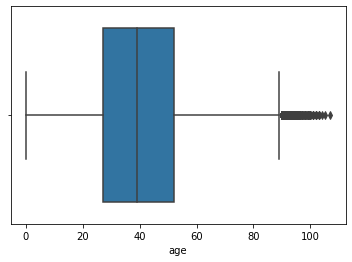

In [18]:
sns.boxplot(df['age'])
plt.show()

In [19]:
dfcorr=df.corr()
dfcorr

,age,gender,recovered,dead,notification_year,notification_month,death_year,death_month
age,1.000000,-0.020155,-0.179320,0.245641,-0.002461,-0.014265,-0.193223,0.063245
gender,-0.020155,1.000000,-0.031439,0.033646,0.008149,-0.007002,-0.000972,0.000252
recovered,-0.179320,-0.031439,1.000000,-0.644250,-0.143944,0.012120,NaN,NaN
dead,0.245641,0.033646,-0.644250,1.000000,0.015138,-0.024073,NaN,NaN
notification_year,-0.002461,0.008149,-0.143944,0.015138,1.000000,-0.521549,0.938708,-0.457947
notification_month,-0.014265,-0.007002,0.012120,-0.024073,-0.521549,1.000000,-0.426713,0.306990
death_year,-0.193223,-0.000972,NaN,NaN,0.938708,-0.426713,1.000000,-0.507221
death_month,0.063245,0.000252,NaN,NaN,-0.457947,0.306990,-0.507221,1.000000


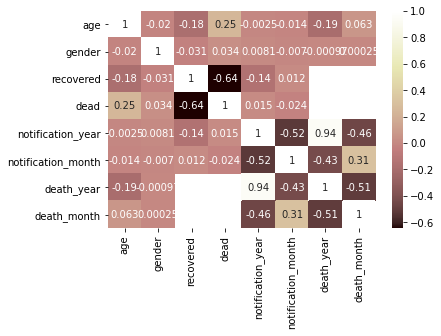

In [20]:
sns.heatmap(dfcorr,annot=True,cmap='pink')
plt.show()

/Users/beelzebruno/.virtualenvs/ml/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dead', ylabel='count'>

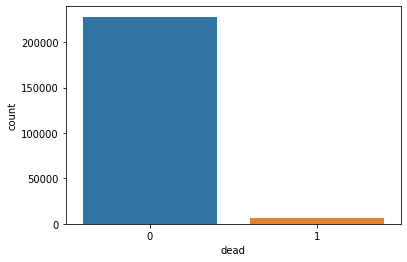

In [21]:
sns.countplot(df['dead'])

/Users/beelzebruno/.virtualenvs/ml/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='notification_year', ylabel='count'>

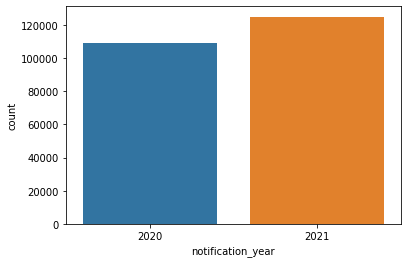

In [22]:
sns.countplot(df['notification_year'])

/Users/beelzebruno/.virtualenvs/ml/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='death_year', ylabel='count'>

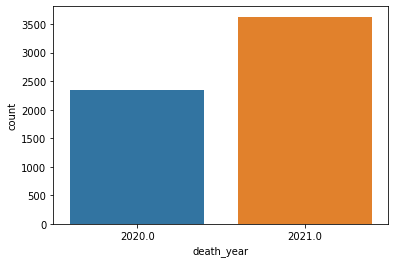

In [23]:
sns.countplot(df['death_year'])

/Users/beelzebruno/.virtualenvs/ml/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='death_month', ylabel='count'>

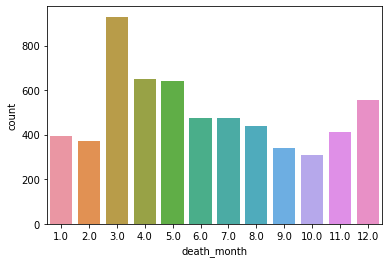

In [24]:
sns.countplot(df['death_month'])

/Users/beelzebruno/.virtualenvs/ml/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

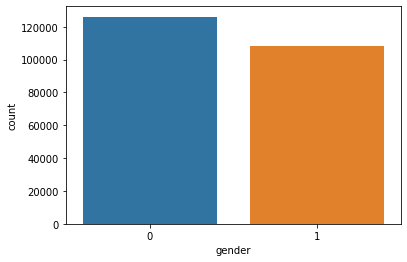

In [25]:
sns.countplot(df['gender'])

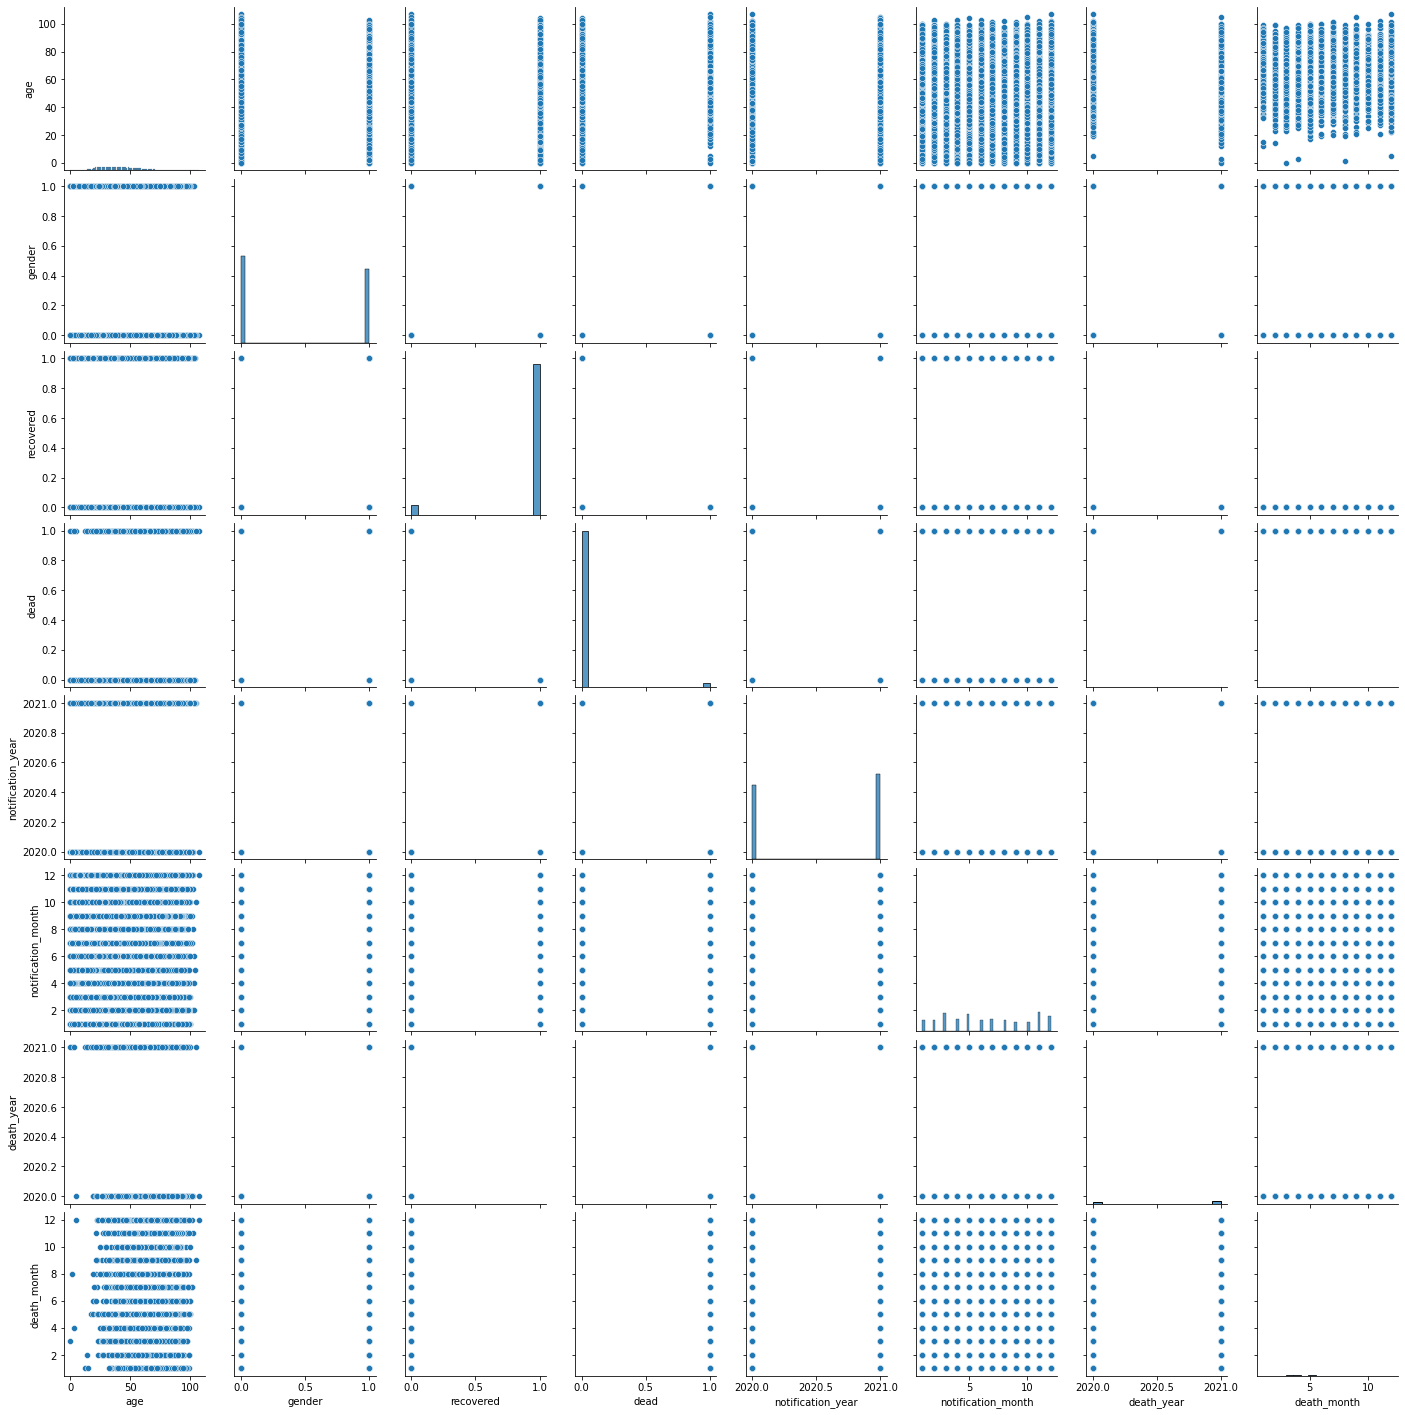

In [26]:
sns.pairplot(df)

/Users/beelzebruno/.virtualenvs/ml/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='gender'>

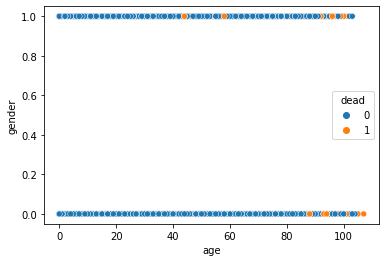

In [27]:
sns.scatterplot(df['age'], df['gender'],hue=df['dead'])

/Users/beelzebruno/.virtualenvs/ml/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='district', ylabel='age'>

/Users/beelzebruno/.virtualenvs/ml/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


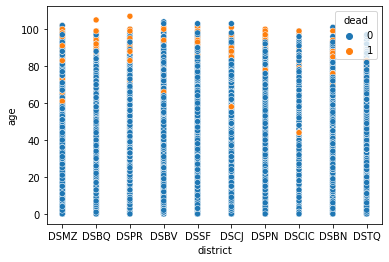

In [28]:
sns.scatterplot(df['district'], df['age'],hue=df['dead'])

/Users/beelzebruno/.virtualenvs/ml/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='death_month', ylabel='notification_year'>

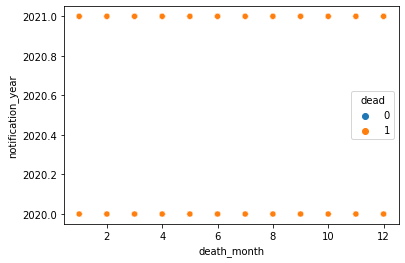

In [29]:
sns.scatterplot(df['death_month'], df['notification_year'],hue=df['dead'])

<AxesSubplot:ylabel='Frequency'>

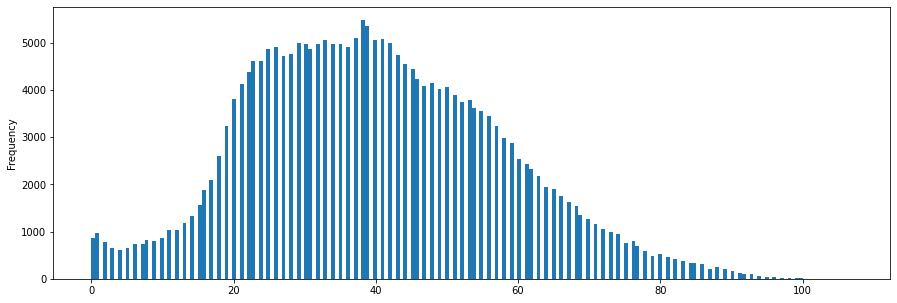

In [30]:
df.age.plot.hist(figsize=(15, 5), bins=200)

<AxesSubplot:>

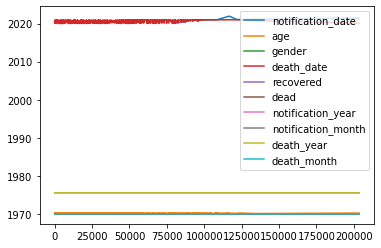

In [31]:
# deaths_per_month = []
df.loc[(df['death_date'] >= '2020-01-01') &
               (df['death_date'] < '2021-01-01')].plot()



In [32]:
twok20_deaths = df.loc[(df['death_date'] >= '2020-01-01') &
               (df['death_date'] < '2021-01-01')]

deathcount_2020_month = Counter([int(i) for i in twok20_deaths.death_month.values])

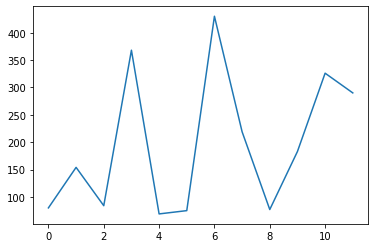

In [33]:
plt.plot(deathcount_2020_month.values())

In [34]:
twok21_deaths = df.loc[(df['death_date'] >= '2021-01-01')]

deathcount_2021_month = Counter([int(i) for i in twok21_deaths.death_month.values])

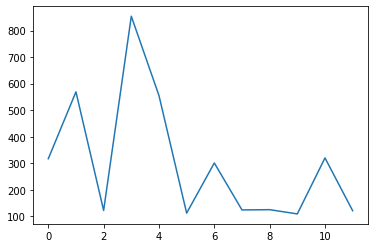

In [35]:
plt.plot(deathcount_2021_month.values())

In [46]:
twok20_male_deaths = df.loc[(df['death_date'] >= '2020-01-01') &
               (df['death_date'] < '2021-01-01') & df['gender'] == 1]

twok20_female_deaths = df.loc[(df['death_date'] >= '2020-01-01') &
               (df['death_date'] < '2021-01-01') & df['gender'] == 0]

# 
# print()


In [54]:
male_deathcount_2020_month = Counter([int(i) for i in twok20_male_deaths.death_month.values])
# female_deathcount_2020_month = Counter([int(i) for i in twok20_female_deaths.death_month.values])
# plt.plot(male_deathcount_2020_month.values())

In [62]:
twok20_female_deaths.death_month.values

array([nan, nan, nan, ..., nan,  6.,  6.])